In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
file_path = '/Users/Pato/Dev/Python/data_temps/ML_Templates/logistic regression/data/log_reg_cleaning.csv'

data = pd.read_csv(file_path)

target_variable = 'Attrition'  # Replace with the actual target column


In [2]:
data.T.iloc[:,0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
OverTime                                Yes
PercentSalaryHike                        11
PerformanceRating                         3
RelationshipSatisfaction        

In [4]:
import pandas as pd


non_numeric_columns = data.select_dtypes(exclude=['number']).columns

for column in non_numeric_columns:
    unique_count = data[column].nunique()
    unique_values = data[column].unique()
    print(f"Column '{column}'({unique_count}):{unique_values}")


Column 'Attrition'(2):['Yes' 'No']
Column 'BusinessTravel'(3):['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Column 'Department'(3):['Sales' 'Research & Development' 'Human Resources']
Column 'EducationField'(6):['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Column 'Gender'(2):['Female' 'Male']
Column 'JobRole'(9):['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Column 'MaritalStatus'(3):['Single' 'Married' 'Divorced']
Column 'OverTime'(2):['Yes' 'No']
Column 'Age_Bucket'(5):['High' 'Very High' 'Average' 'Low' nan 'Very Low']
Column 'DistanceFromHome_Bucket'(4):['Low' 'Average' 'Very High' nan 'High']
Column 'TotalWorkingYears_Bucket'(4):['Average' 'High' 'Low' nan 'Very High']
Column 'YearsAtCompany_Bucket'(4):['Average' 'High' 'Low' nan 'Very High']


In [5]:
# Binary conversion 
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
# data['Over18'] = data['Over18'].map({'Y': 1})  # 'Over18' only has 'Y', so map it to 1


In [6]:
# Ordinal encoding 
data['BusinessTravel'] = data['BusinessTravel'].map({
    'Non-Travel': 2, 
    'Travel_Frequently': 1, 
    'Travel_Rarely': 0
})


In [7]:
# One-Hot Encoding 
data = pd.get_dummies(data, columns=['JobRole', 'EducationField', 'MaritalStatus', 'Department'], drop_first=True)


In [8]:
data = pd.get_dummies(data, drop_first=True)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Basic Logistic Regression Accuracy: {accuracy:.2f}")


Basic Logistic Regression Accuracy: 0.87


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Count NaN values per column
nans_per_column = data.isna().sum()
print("NaN values per column:")
print(nans_per_column)


NaN values per column:
Age                                   0
Attrition                             0
BusinessTravel                        0
DailyRate                             0
DistanceFromHome                      0
Education                             0
EnvironmentSatisfaction               0
Gender                                0
HourlyRate                            0
JobInvolvement                        0
JobLevel                              0
JobSatisfaction                       0
MonthlyIncome                         0
MonthlyRate                           0
NumCompaniesWorked                    0
PercentSalaryHike                     0
PerformanceRating                     0
RelationshipSatisfaction              0
StockOptionLevel                      0
TotalWorkingYears                     0
TrainingTimesLastYear                 0
WorkLifeBalance                       0
YearsAtCompany                        0
YearsInCurrentRole                    0
YearsSinceLastPro

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_curve, roc_auc_score
)
from matplotlib.gridspec import GridSpec
import pandas as pd
from matplotlib.table import Table
import random
import inspect

def create_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    return y_test, y_pred, y_prob

def create_summary_stats(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    }

def create_presentation_table(ax, summary_stats, model_name):
    cell_text = [[f"{value:.4f}"] for value in summary_stats.values()]
    row_labels = list(summary_stats.keys())
    
    table = ax.table(cellText=cell_text, rowLabels=row_labels, colLabels=["Value"],
                     cellLoc='center', loc='center', colWidths=[0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1.5, 1.5)
    
    for key, cell in table.get_celld().items():
        cell.set_edgecolor('black')
        cell.set_linewidth(2)
    
    ax.set_title(f'{model_name} Performance Metrics', fontsize=16, fontweight='bold')
    ax.axis('off')

def logistic_regression_graphs(model, X_test, y_test, y_pred, y_prob, summary_stats, model_name):
    cm = confusion_matrix(y_test, y_pred)
    
    # Generate random color for all charts except the last two feature importance plots
    random_color = random.choice(sns.color_palette("husl", 8))
    
    fig = plt.figure(figsize=(14, 16))
    gs = GridSpec(4, 2, figure=fig, height_ratios=[0.8, 1, 1.5, 1.5])
    
    # Subplot 1: Summary Table
    ax0 = fig.add_subplot(gs[0, :])
    create_presentation_table(ax0, summary_stats, model_name)
    
    # Subplot 2: Confusion Matrix (square aspect ratio)
    ax1 = fig.add_subplot(gs[1, 0])
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette(random_color, as_cmap=True), cbar=False, ax=ax1)
    ax1.set_title(f'{model_name} - Confusion Matrix', fontsize=14)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_aspect('equal')

    # Subplot 3: ROC Curve (square aspect ratio)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    ax2 = fig.add_subplot(gs[1, 1])
    ax2.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})', color=random_color)
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'{model_name} - ROC Curve', fontsize=14)
    ax2.legend(loc='lower right')
    ax2.set_aspect('equal')
    
    # Feature importance plot
    if hasattr(model, 'coef_'):
        feature_importance = np.abs(model.coef_[0])
        feature_names = X_test.columns
        
        sorted_idx = np.argsort(feature_importance)[::-1]
        top_features = feature_names[sorted_idx]
        top_importance = feature_importance[sorted_idx]
        
        # Subplot 4: Feature Importance (All Features) with stepped alpha
        ax3 = fig.add_subplot(gs[2, :])
        bar_colors = [random_color] * len(top_features)  # All bars have the same color
        alphas = np.linspace(1.0, 0.4, len(top_features))  # Stepped alpha from 1.0 to 0.4
        
        for i, (imp, feat) in enumerate(zip(top_importance, top_features)):
            ax3.bar(feat, imp, color=random_color, alpha=alphas[i])
        
        ax3.set_title(f'{model_name} - Feature Importance (All Features)', fontsize=14)
        ax3.set_ylabel('Importance')
        plt.xticks(rotation=45, ha='right')

        # Subplot 5: Top 5 Important Features - using shades of green
        ax4 = fig.add_subplot(gs[3, 0])
        sns.barplot(x=top_importance[:5], y=top_features[:5], palette='Greens_r', ax=ax4)
        ax4.set_title(f'{model_name} - Top 5 Important Features', fontsize=12)
        ax4.set_xlabel('Importance')
        ax4.set_ylabel('')
        plt.xticks(rotation=45, ha='right')

        # Subplot 6: Bottom 5 Least Important Features - using shades of red
        ax5 = fig.add_subplot(gs[3, 1])
        sns.barplot(x=top_importance[-5:], y=top_features[-5:], palette='Reds_r', ax=ax5)
        ax5.set_title(f'{model_name} - Bottom 5 Least Important Features', fontsize=12)
        ax5.set_xlabel('Importance')
        ax5.set_ylabel('')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

def summarise_model(model, X_test, y_test):
    # Get the name of the variable passed as `model`
    model_name = [name for name, value in inspect.currentframe().f_back.f_locals.items() if value is model][0]
    
    y_test, y_pred, y_prob = create_predictions(model, X_test, y_test)
    summary_stats = create_summary_stats(y_test, y_pred, y_prob)
    logistic_regression_graphs(model, X_test, y_test, y_pred, y_prob, summary_stats, model_name)


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

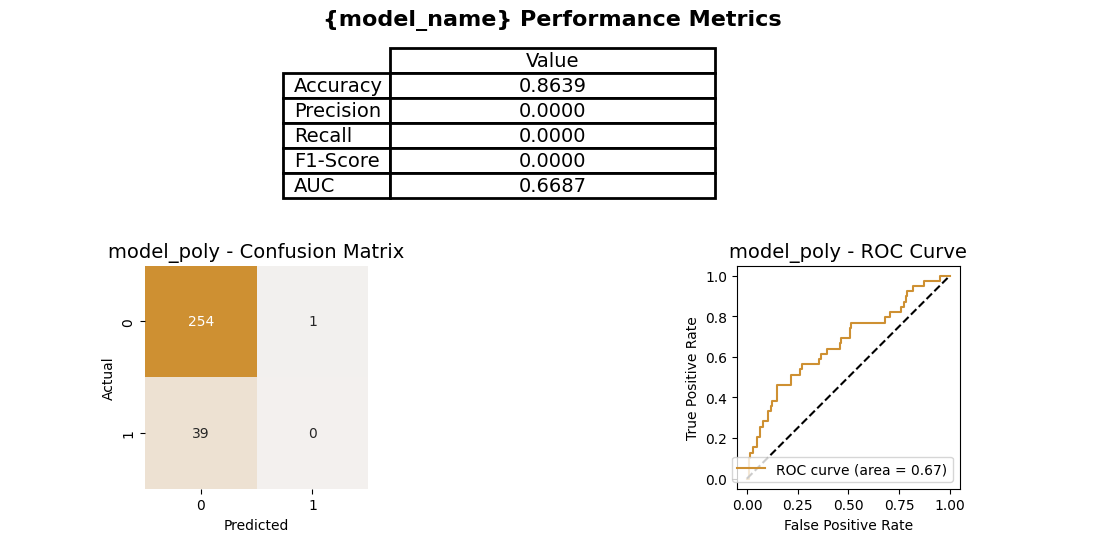

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Logistic Regression on Polynomial Features
model_poly = LogisticRegression()
model_poly.fit(X_poly, y_train)

# Predictions and Evaluation
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)

summarise_model(model_poly,X_test_poly, y_test)

/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/979527471.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance[:5], y=top_features[:5], palette='Greens_r', ax=ax4)
/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/979527471.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance[-5:], y=top_features[-5:], palette='Reds_r', ax=ax5)


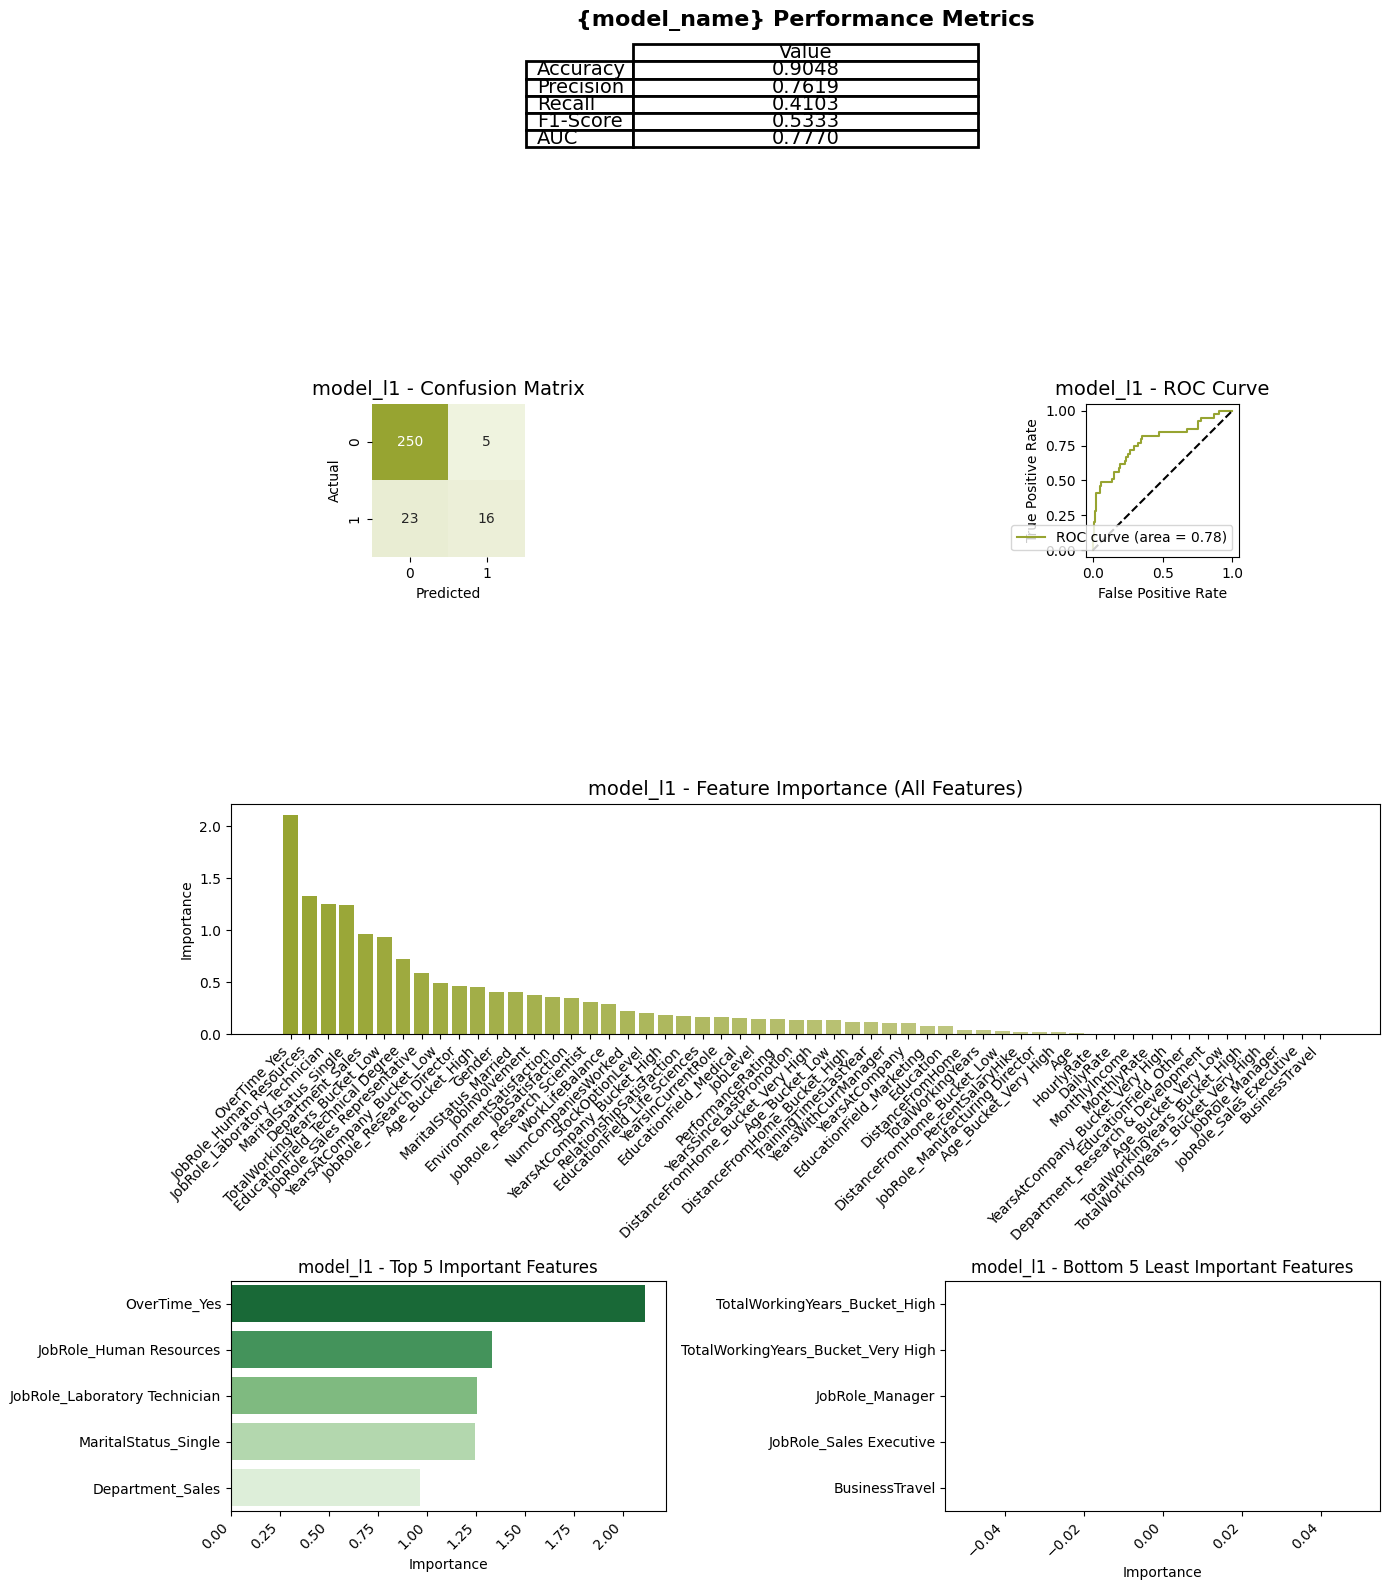

In [66]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
summarise_model(model_l1, X_test, y_test)




/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/1351898762.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance[:5], y=top_features[:5], palette='Greens_r', ax=ax4)
/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/1351898762.py:110: FutureWarning:

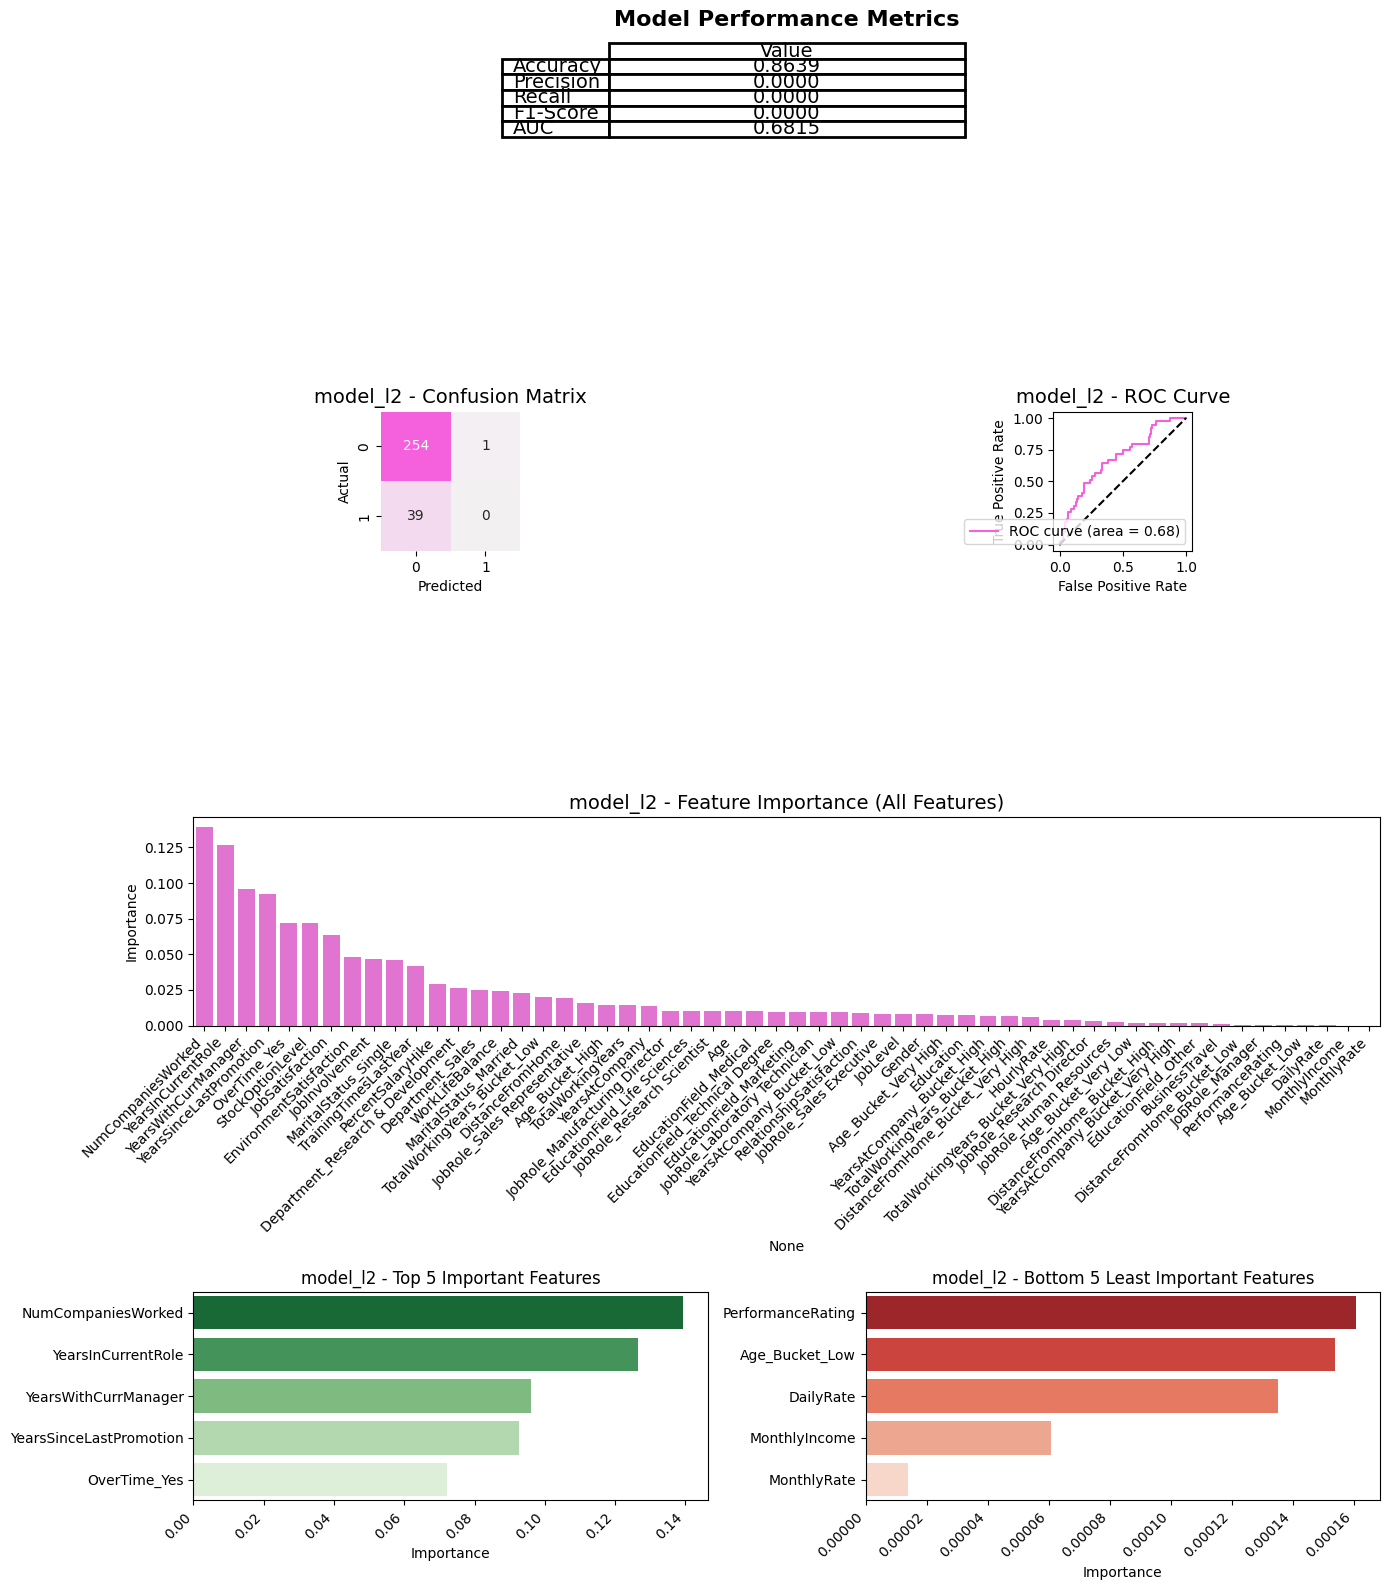

In [54]:

# L2 Regularization (default)
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
summarise_model(model_l2, X_test, y_test)




/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/3931727355.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_importance, x=top_features, palette='Greens_r', ax=ax3)
/var/folders/sw/wnh5xb2s66v5ljpzzgr4xznc0000gn/T/ipykernel_3260/3931727355.py:100: FutureWa

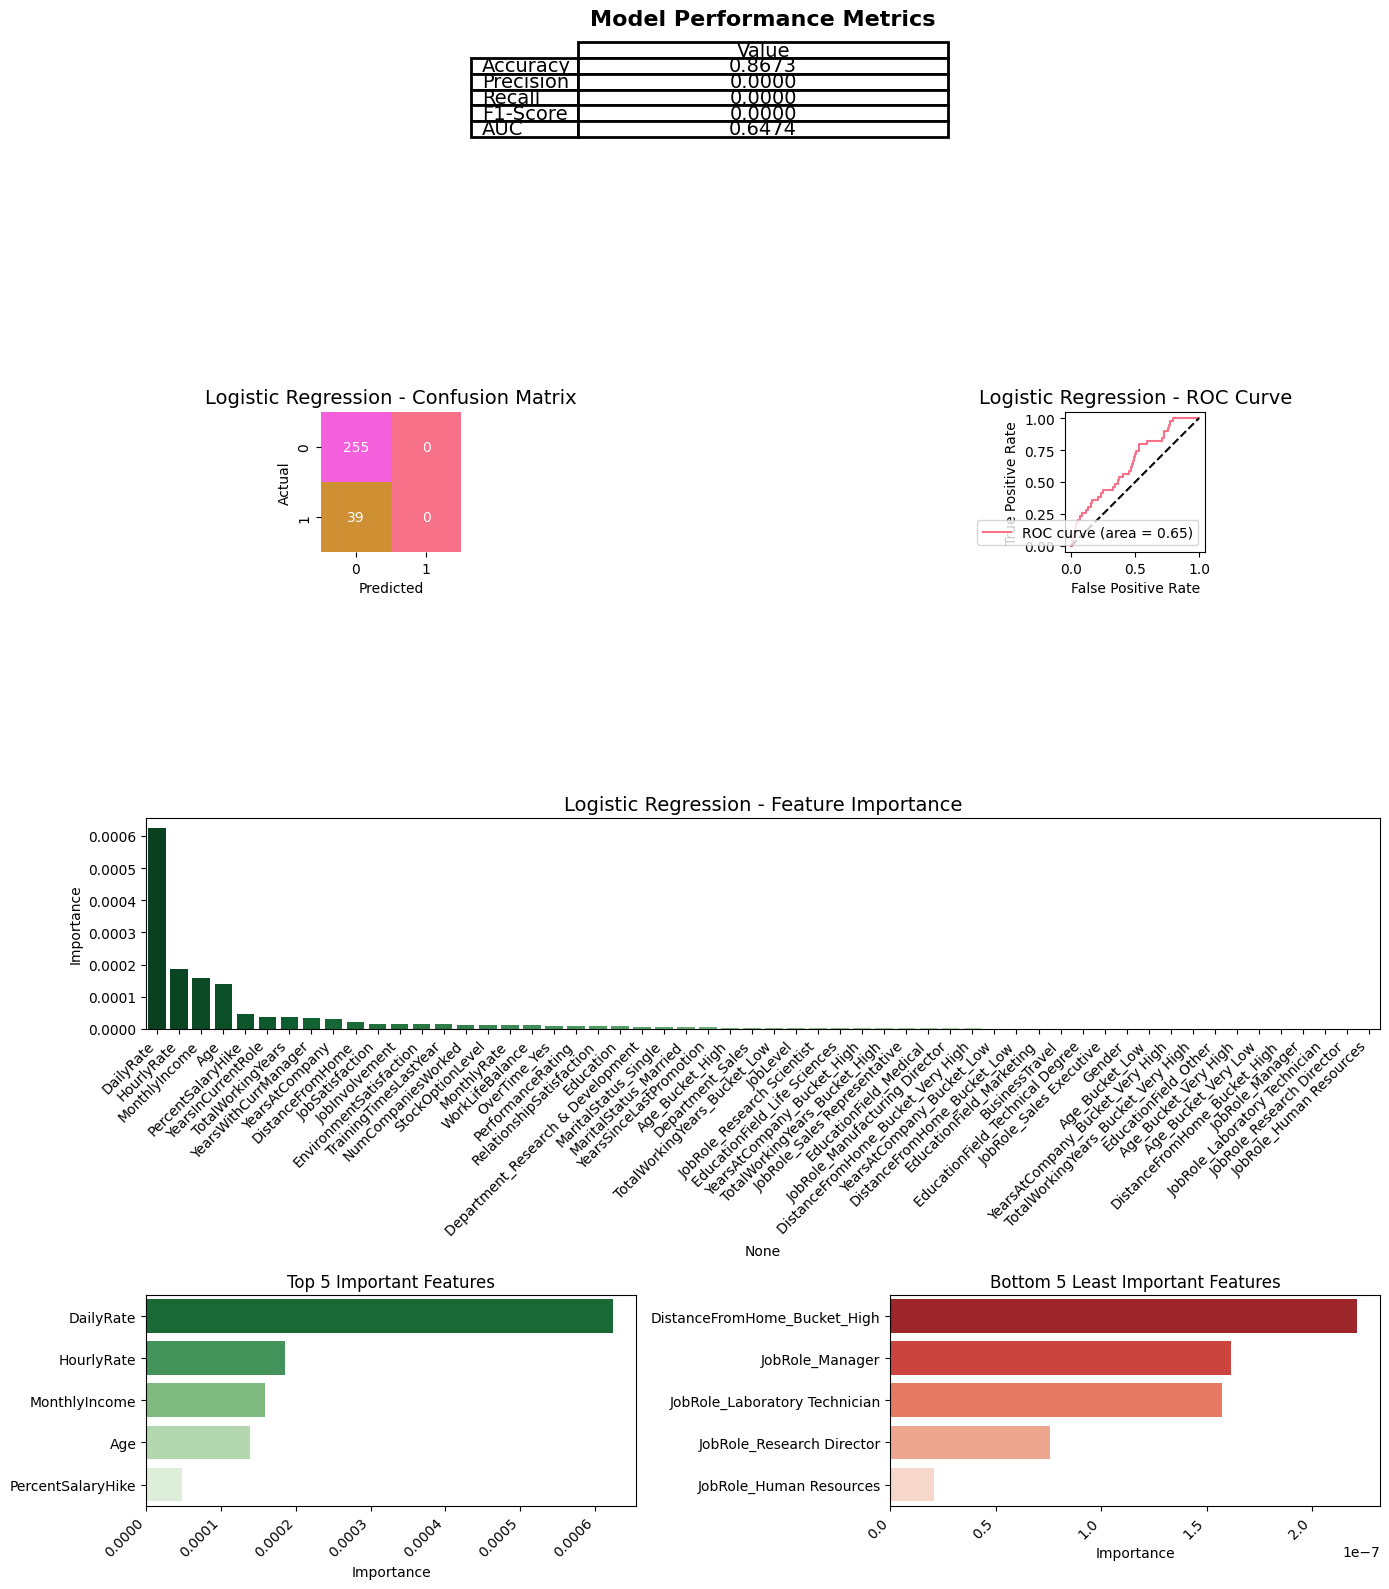

In [43]:

# ElasticNet Regularization
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_elastic.fit(X_train, y_train)
summarise_model(model_elastic, X_test, y_test)


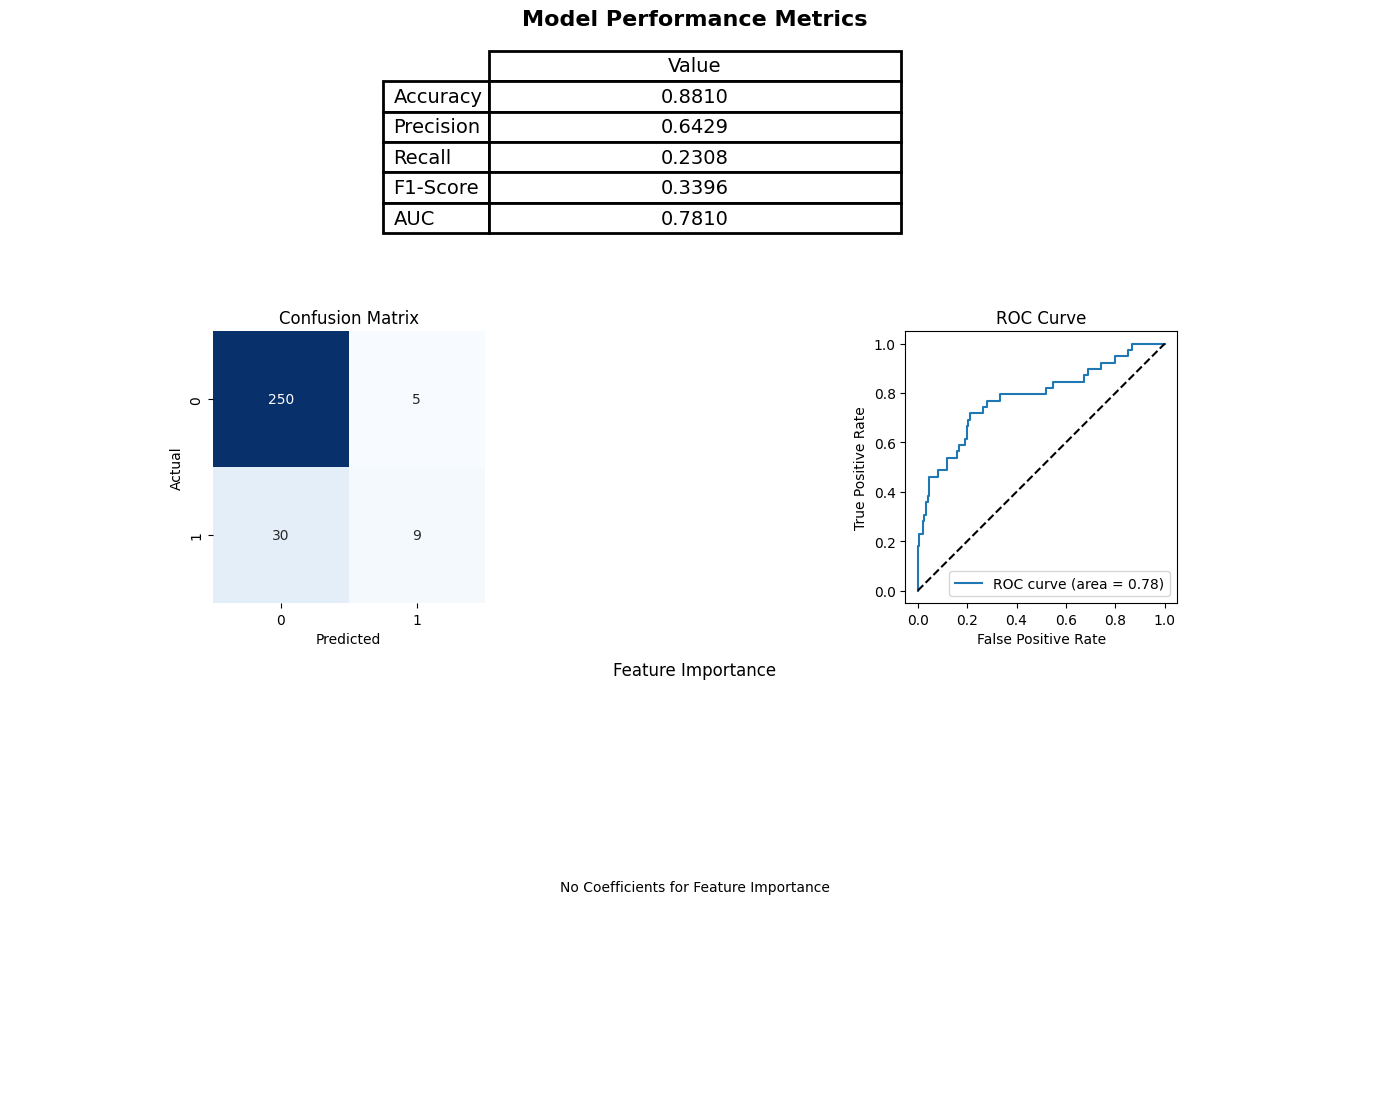

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_model = grid_search.fit(X_train, y_train)

summarise_model(grid_search, X_test, y_test)



/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


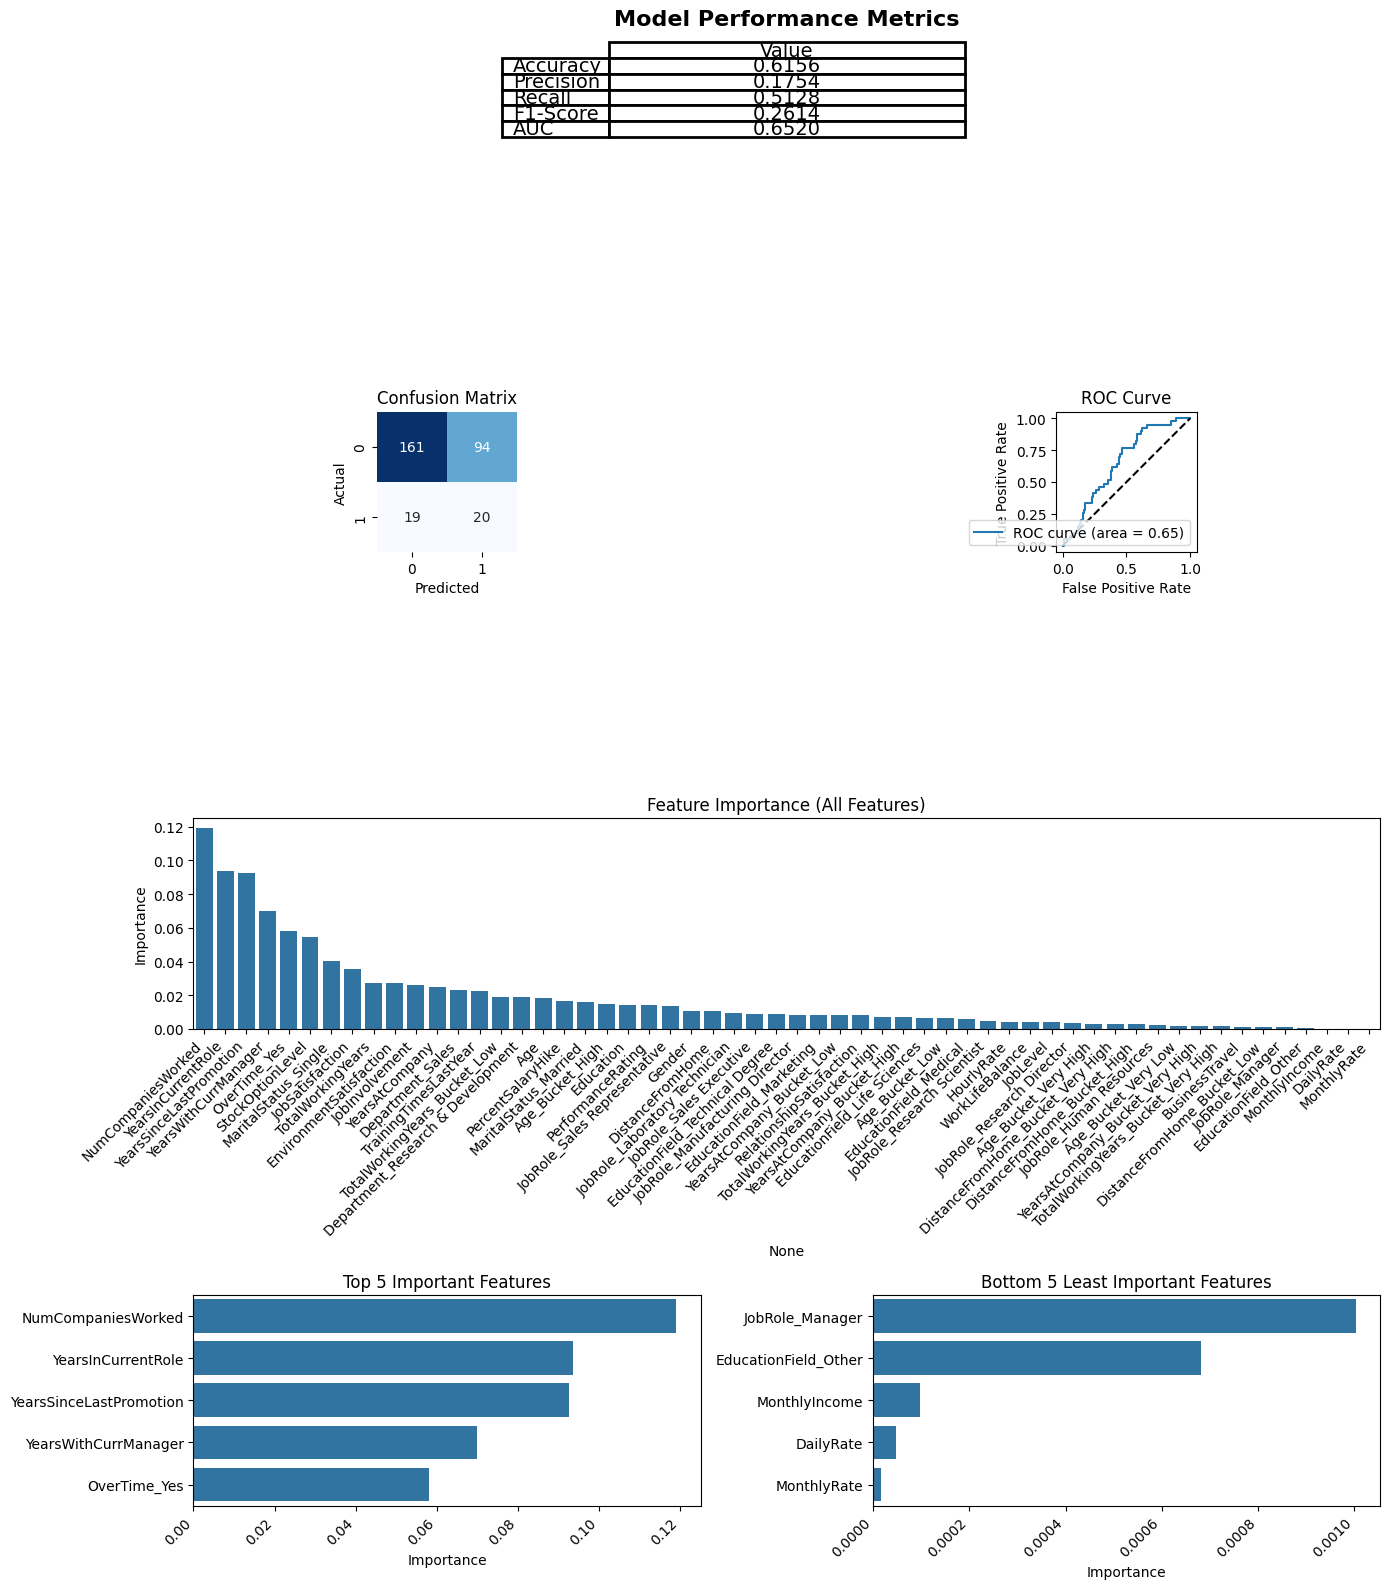

In [26]:
# Logistic Regression with Class Weight Adjustment
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)

summarise_model(model_weighted, X_test, y_test)

In [34]:
from sklearn.feature_selection import RFE

# Feature Selection with RFE
model_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(model_rfe, n_features_to_select=10)
rfe.fit(X_train, y_train )

# Fit and evaluate the model with selected features
y_pred_rfe = rfe.predict(X_test)
print(f"RFE Model Accuracy: {rfe.score(X_test, y_test):.4f}")


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

RFE Model Accuracy: 0.8741


In [58]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Logistic Regression
bagging_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10)
bagging_model.fit(X_train, y_train)

print(f"Bagging Model Accuracy: {bagging_model.score(X_test, y_test):.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [31]:
# Logistic Regression with default threshold
model_threshold = LogisticRegression()
model_threshold.fit(X_train, y_train)

# Predict probabilities
y_prob = model_threshold.predict_proba(X_test)[:, 1]

# Change the threshold to 0.4
y_pred_adjusted = (y_prob >= 0.4).astype(int)
print(f"Adjusted Threshold Model Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")


Adjusted Threshold Model Accuracy: 0.8537


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import classification_report, roc_auc_score

model_eval = LogisticRegression()
model_eval.fit(X_train, y_train)

y_pred_eval = model_eval.predict(X_test)
y_prob_eval = model_eval.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred_eval))

# AUC score
auc = roc_auc_score(y_test, y_prob_eval)
print(f"AUC Score: {auc:.4f}")


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.86      0.80       294

AUC Score: 0.6815


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/Pato/Dev/Python/data_temps/ML_Templates/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

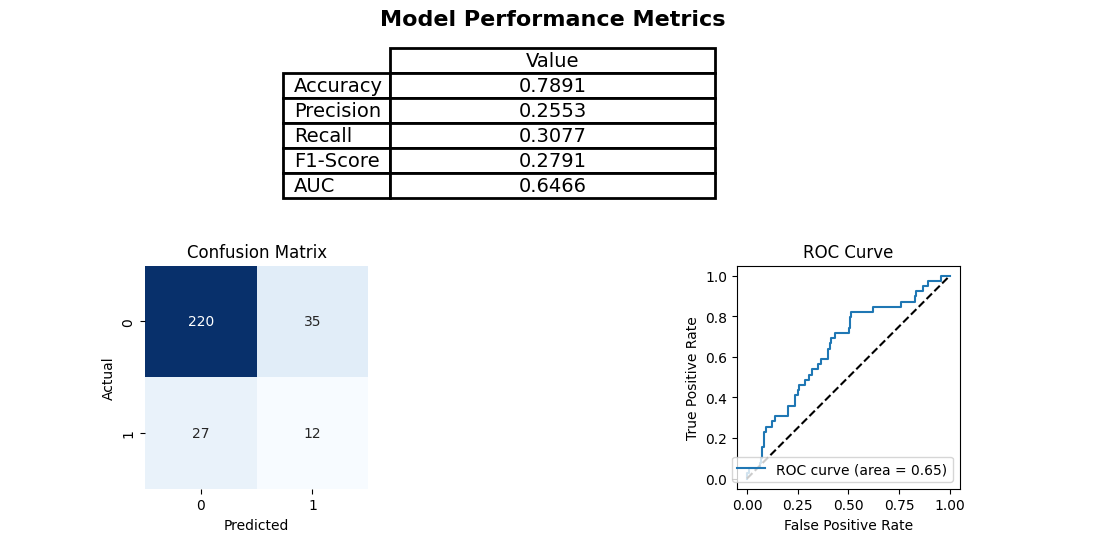

In [33]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression with PCA-transformed features
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)


summarise_model(model_pca, X_test_pca, y_test)
